In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
# Read data
lincs_dataset_dataframe = pd.DataFrame(json.loads(unicode(urllib2.urlopen('http://lincsportal.ccs.miami.edu/dcic/api/fetchdata?searchTerm=*&limit=2000').read(), errors='ignore'))['results']['documents']).set_index('datasetid')
lincs_dataset_dataframe.head()

,_version_,antibody,assaydesignmethod,assayformat,assayname,assayoverview,biologicalbucket,biologicalprocess,cellline,centerdatasetid,...,screeninglabinvestigator,size,smallmolecule,smlincsidentifier,statsfields,statsvalues,technologies,timepoints,tool,toollink
datasetid,,,,,,,,,,,,,,,,,,,,,
LDS-1009,1571407499608719360,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20023/,...,Qingsong Liu,[ 0.07],[SB590885],"[LSM-42746, LSM-42746]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1018,1571407499677925376,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20032/,...,Qingsong Liu,[ 0.07],[GW843682X],"[LSM-1014, LSM-1014]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1017,1571407499740839936,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20031/,...,Qingsong Liu,[ 0.07],[GSK-461364],"[LSM-1013, LSM-1013]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1006,1571407499804803072,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20020/,...,Qingsong Liu,[ 0.07],[Sorafenib],"[LSM-1008, LSM-1008]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1007,1571407499867717632,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20021/,...,Qingsong Liu,[ 0.07],[HG6-64-1],"[LSM-43248, LSM-43248]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...


In [3]:
# Read data
# lincs_dataframe = pd.read_table('../data/lincs_dataframe.txt').set_index('ldplink')
# lincs_dataframe.head()

In [4]:
technology_count_dataframe = lincs_dataset_dataframe['technologies'].reset_index().drop_duplicates().groupby('technologies').size().rename('count').sort_values(ascending=False).to_frame().reset_index()

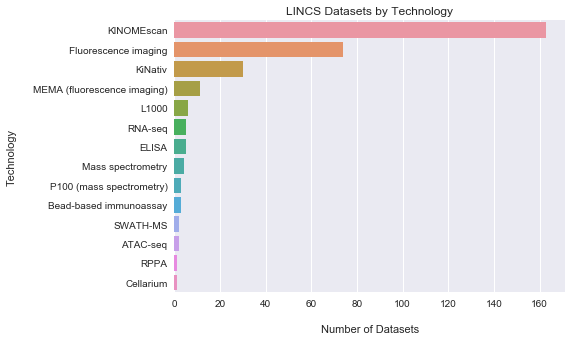

In [5]:
fig, ax = plt.subplots(figsize = [7,5])
g = sns.barplot(x="count", y="technologies", data=technology_count_dataframe)
g.set(xlabel='\nNumber of Datasets', ylabel='Technology\n')
plt.title('LINCS Datasets by Technology')
plt.show()

In [6]:
cell_lines = [y for x in lincs_dataset_dataframe['cellline'] if not isinstance(x, float) for y in x]
cell_line_count_dataframe = pd.Series(Counter(cell_lines)).sort_values(ascending=False).rename('count').to_frame().reset_index()

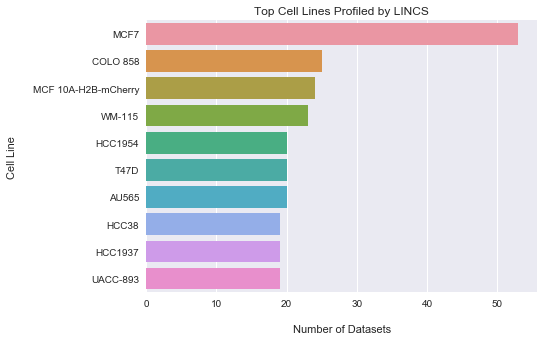

In [7]:
fig, ax = plt.subplots(figsize = [7,5])
g = sns.barplot(x="count", y="index", data=cell_line_count_dataframe.iloc[:10])
g.set(xlabel='\nNumber of Datasets', ylabel='Cell Line\n')
plt.title('Top Cell Lines Profiled by LINCS')
plt.show()

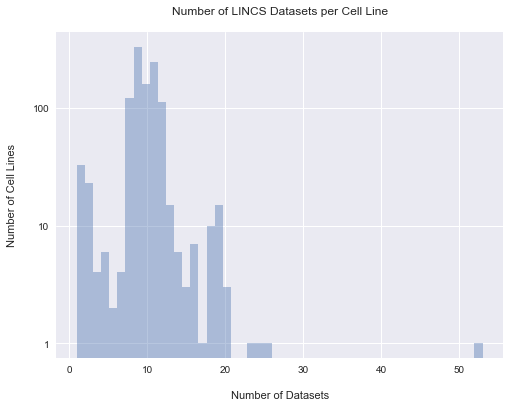

In [8]:
ticks = [10**x for x in range(3)]
fig, ax = plt.subplots(figsize = [8,6])
g = sns.distplot(cell_line_count_dataframe["count"], kde=False)
g.set(xlabel='\nNumber of Datasets', ylabel='Number of Cell Lines\n')
g.set_yscale('log')
g.set_yticks(ticks)
g.set_yticklabels(ticks)
plt.title('Number of LINCS Datasets per Cell Line\n')
plt.show()

In [9]:
small_molecules = [y for x in lincs_dataset_dataframe['smallmolecule'] if not isinstance(x, float) for y in x]
small_molecule_count_dataframe = pd.Series(Counter(small_molecules)).sort_values(ascending=False).rename('count').to_frame().reset_index()

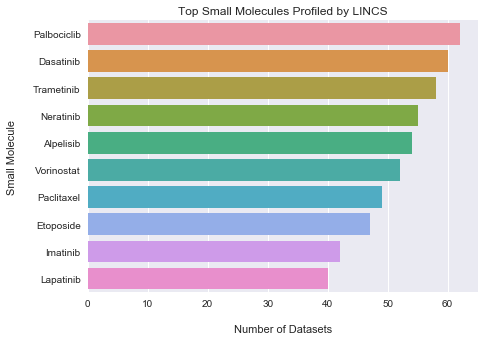

In [10]:
fig, ax = plt.subplots(figsize = [7,5])
g = sns.barplot(x="count", y="index", data=small_molecule_count_dataframe.iloc[:10])
g.set(xlabel='\nNumber of Datasets', ylabel='Small Molecule\n')
plt.title('Top Small Molecules Profiled by LINCS')
plt.show()

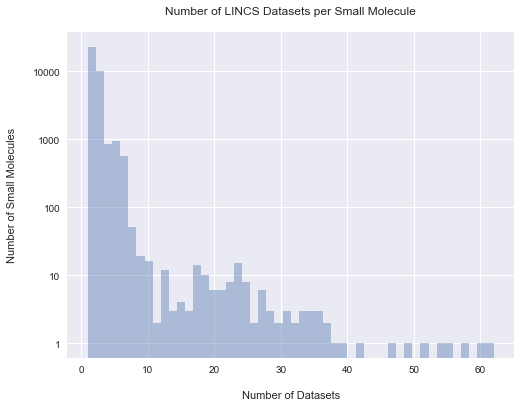

In [11]:
ticks = [10**x for x in range(5)]
fig, ax = plt.subplots(figsize = [8,6])
g = sns.distplot(small_molecule_count_dataframe["count"], kde=False)
g.set(xlabel='\nNumber of Datasets', ylabel='Number of Small Molecules\n')
g.set_yscale('log')
g.set_yticks(ticks)
g.set_yticklabels(ticks)
plt.title('Number of LINCS Datasets per Small Molecule\n')
plt.show()

In [12]:
lincs_dataset_dataframe.head()

,_version_,antibody,assaydesignmethod,assayformat,assayname,assayoverview,biologicalbucket,biologicalprocess,cellline,centerdatasetid,...,screeninglabinvestigator,size,smallmolecule,smlincsidentifier,statsfields,statsvalues,technologies,timepoints,tool,toollink
datasetid,,,,,,,,,,,,,,,,,,,,,
LDS-1009,1571407499608719360,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20023/,...,Qingsong Liu,[ 0.07],[SB590885],"[LSM-42746, LSM-42746]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1018,1571407499677925376,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20032/,...,Qingsong Liu,[ 0.07],[GW843682X],"[LSM-1014, LSM-1014]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1017,1571407499740839936,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20031/,...,Qingsong Liu,[ 0.07],[GSK-461364],"[LSM-1013, LSM-1013]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1006,1571407499804803072,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20020/,...,Qingsong Liu,[ 0.07],[Sorafenib],"[LSM-1008, LSM-1008]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...
LDS-1007,1571407499867717632,NaN,[KINOMEscan],Biochemical,[KINOMEscan kinase-small molecule binding assay],The KINOMEscan assay platform is based on a co...,Binding,[Small molecule metabolic process],NaN,http://lincs.hms.harvard.edu/db/datasets/20021/,...,Qingsong Liu,[ 0.07],[HG6-64-1],"[LSM-43248, LSM-43248]","[smallmolecule, protein]","[1, 432]",KINOMEscan,[],"[Harmonizome, Life]",[http://amp.pharm.mssm.edu/Harmonizome/dataset...


In [13]:
cell_line_dataframe = pd.DataFrame([{'datasetid': index, 'cellline': cellline} for index, celllines in lincs_dataset_dataframe['cellline'].dropna().iteritems() for cellline in celllines])
small_molecule_dataframe = pd.DataFrame([{'datasetid': index, 'smallmolecule': smallmolecule} for index, smallmolecules in lincs_dataset_dataframe['smallmolecule'].dropna().iteritems() for smallmolecule in smallmolecules])
technology_dataframe = lincs_dataset_dataframe['technologies'].dropna().reset_index()
merged_dataframe = reduce(lambda x, y: pd.merge(x, y, on = 'datasetid'), [cell_line_dataframe, small_molecule_dataframe, technology_dataframe]).drop_duplicates()
print merged_dataframe.shape
merged_dataframe.head()

(526901, 4)


,cellline,datasetid,smallmolecule,technologies
0,COLO-800,LDS-1002,GW843682X,Fluorescence imaging
1,COLO-800,LDS-1002,Tozasertib,Fluorescence imaging
2,COLO-800,LDS-1002,BI-2536,Fluorescence imaging
3,COLO-800,LDS-1002,Paclitaxel,Fluorescence imaging
4,COLO-800,LDS-1002,Staurosporine,Fluorescence imaging


In [20]:
cols = ['cellline', 'smallmolecule', 'technologies']
getcols = lambda x: [col for col in cols if col != x]
counts = {x: pd.pivot_table(merged_dataframe.drop(x, axis=1).drop_duplicates().groupby(getcols(x)).size().rename('count').reset_index(), index=getcols(x)[0], columns=getcols(x)[1], values='count').fillna(0) for x in cols}
counts['technologies'].head()

smallmolecule,"((2,3-dimethyl-5-oxo-1-phenyl(3-pyrazolin-4-yl))amino)-n-((4-methylphenyl)sulfonyl)formamide",(+)-artemisinin,(+)-camptothecin,(+)-niguldipine,(+)-secoisolariciresinol,(+)-taxifolin,(+)-timolol,(+)-tranylcypromine,(+)-uh-232,(+/-)-kavain,...,rifabutin,rifampicin,rifapentine,roxithromycin,scopolamine,sirolimus,thiostrepton,verteporfin,{1-[3-(4-methylphenoxy)propyl]-1h-benzimidazol-2-yl}methanol,{4-[(2-bromophenoxy)methyl]phenyl}(piperidin-1-yl)methanone
cellline,,,,,,,,,,,,,,,,,,,,,
1205Lu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1321N1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143B PML BK TK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184A1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
counts['cellline'].head()

technologies,Cellarium,Fluorescence imaging,KiNativ,L1000,Mass spectrometry,P100 (mass spectrometry),RPPA
smallmolecule,,,,,,,
"((2,3-dimethyl-5-oxo-1-phenyl(3-pyrazolin-4-yl))amino)-n-((4-methylphenyl)sulfonyl)formamide",0.0,1.0,0.0,1.0,0.0,0.0,0.0
(+)-artemisinin,0.0,1.0,0.0,1.0,0.0,0.0,0.0
(+)-camptothecin,0.0,0.0,0.0,1.0,0.0,0.0,0.0
(+)-niguldipine,0.0,1.0,0.0,1.0,0.0,0.0,0.0
(+)-secoisolariciresinol,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
counts['smallmolecule'].head()

technologies,Cellarium,Fluorescence imaging,KiNativ,L1000,Mass spectrometry,P100 (mass spectrometry),RPPA
cellline,,,,,,,
1205Lu,0.0,9.0,0.0,0.0,0.0,0.0,0.0
1321N1,0.0,10.0,0.0,0.0,0.0,0.0,0.0
143B,0.0,10.0,0.0,0.0,0.0,0.0,0.0
143B PML BK TK,0.0,10.0,0.0,0.0,0.0,0.0,0.0
184A1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# ticks = [0, 5, 10, 20, 30, 35]
# fig, ax = plt.subplots(figsize = [12,6])
# g = sns.heatmap(np.log10(counts['smallmolecule'].T+1))
# cbar = g.collections[0].colorbar
# cbar.set_ticks([np.log10(x) if x > 0 else 0 for x in ticks])
# cbar.set_ticklabels(ticks)
# plt.show()

In [ ]:
# ticks = [0, 5, 10, 20, 30, 35]
# fig, ax = plt.subplots(figsize = [12,6])
# g = sns.heatmap(np.log10(counts['cellline'].T+1))
# cbar = g.collections[0].colorbar
# cbar.set_ticks([np.log10(x) if x > 0 else 0 for x in ticks])
# cbar.set_ticklabels(ticks)
# plt.show()

In [33]:
top = {x: counts['technologies'].apply(np.sum, x).sort_values(ascending=False).index.tolist()[:100] for x in [0,1]}

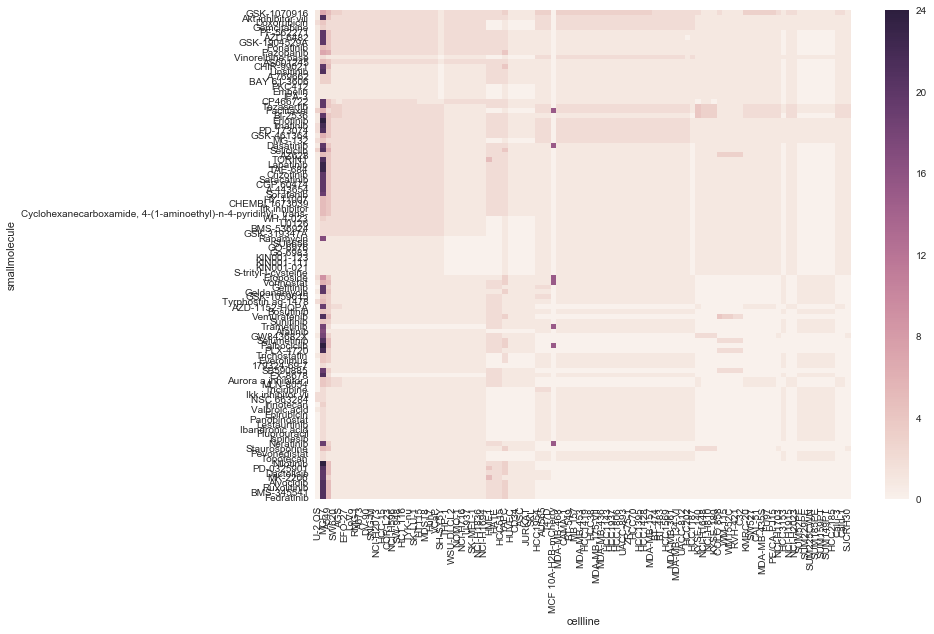

In [34]:
fig, ax = plt.subplots(figsize = [12,9])
sns.heatmap(counts['technologies'].loc[top[1], top[0]].T)
plt.show()